1953: Harry Markowits stated that all eggs shouldn ot be in pone basket. Optimization of portfolo base on the accepted abount of risk. INvestments should not be analyzed individually but in a portfolio. Securties should be observes with interaction with each other in a ortfolio. Low correlation can optimize retuen without assuming additionlal risk. 

In [1]:
import pandas as pd 
import numpy as np 
from pandas_datareader import data as web 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ["UBER", "GE"]
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = web.DataReader(a , data_source = "yahoo", start = "2010-1-1")["Adj Close"]

In [3]:
pf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142 entries, 2019-05-10 to 2019-11-29
Data columns (total 2 columns):
UBER    142 non-null float64
GE      142 non-null float64
dtypes: float64(2)
memory usage: 3.3 KB


In [4]:
pf_data.tail()

,UBER,GE
Date,,
2019-11-22,29.559999,11.55
2019-11-25,29.110001,11.58
2019-11-26,29.530001,11.35
2019-11-27,29.490000,11.29
2019-11-29,29.600000,11.27


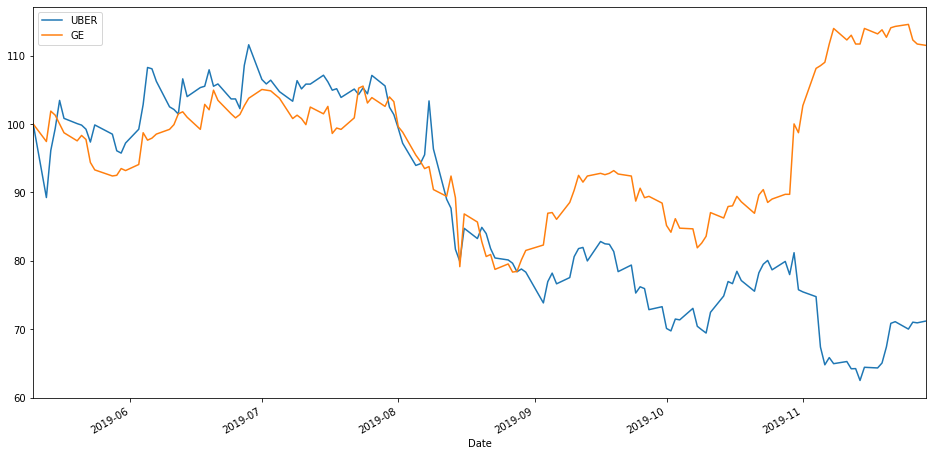

In [5]:
# check the performance of both securities 
(pf_data/pf_data.iloc[0] * 100).plot(figsize = (16,8))
plt.show()

In [6]:
#let get the log returns for the portfolio 
log_returns = np.log(pf_data/pf_data.shift(1))

In [7]:
log_returns.tail()

,UBER,GE
Date,,
2019-11-22,0.003389,0.001733
2019-11-25,-0.015340,0.002594
2019-11-26,0.014325,-0.020062
2019-11-27,-0.001356,-0.005300
2019-11-29,0.003723,-0.001773


In [8]:
#lets get the average return of the two securties 
return_Average = log_returns.mean() * 250
return_Average

UBER   -0.602135
GE      0.192705
dtype: float64

In [9]:
#check the covarience for the portfolio 
log_returns.cov() * 250

,UBER,GE
UBER,0.231041,0.075591
GE,0.075591,0.153081


In [10]:
log_returns.corr()

,UBER,GE
UBER,1.000000,0.401945
GE,0.401945,1.000000


In [11]:
#create a constant of the length of the securities we are analyzing 
num_asset = len(assets)
num_asset

2

In [14]:
# We will run a test for 1000 portfolios to see if markowitz theory is accurate for this portfolio
port_expected_return = []
port_standard_deviation = []

for x in range(1000):
    weights = np.random.random(num_asset)
    weights /= np.sum(weights)
    port_expected_return.append(np.sum(weights * log_returns.mean()) * 250)
    port_standard_deviation.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

portfolio_expected_array = np.array(port_expected_return)
portfolio_std_array = np.array(port_standard_deviation)



In [16]:
#lets plot this to diaply the efficient frontier. We will first need to create a data set 
portfolioDataFrame = pd.DataFrame({"Returns": portfolio_expected_array, "Volatility": portfolio_std_array})


In [17]:
portfolioDataFrame.tail()

,Returns,Volatility
995,-0.196829,0.364795
996,-0.116441,0.357828
997,-0.103718,0.357325
998,-0.397341,0.407922
999,-0.284679,0.379509


In [18]:
portfolioDataFrame.head()

,Returns,Volatility
0,-0.165936,0.361355
1,-0.513872,0.446530
2,-0.187291,0.363633
3,-0.176079,0.362381
4,-0.422972,0.415689


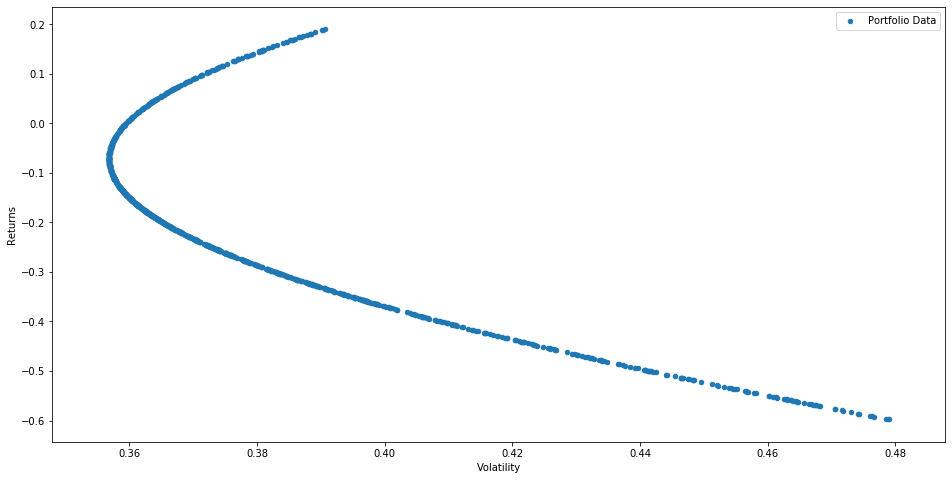

In [19]:
portfolioDataFrame.plot(x = "Volatility", y = "Returns", kind = "scatter", label = "Portfolio Data", figsize=(16,8))